# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

We'll need:
- Pandas library to load, prepare, and analyze the data
- Numpy to simplify sorting and math operations for arrays & series
- Stats from Scipy to compare sample means and obtain p-value
- Pyplot from matplotlib & Seaborn to plot data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('./megaline_calls.csv')
df_data = pd.read_csv('./megaline_internet.csv')
df_messages = pd.read_csv('./megaline_messages.csv')
df_plans = pd.read_csv('./megaline_plans.csv')
df_users = pd.read_csv('./megaline_users.csv')

## Prepare the data

In [3]:
# Using info() method to get familiar with dataframe size, columns, values, null values, and data types

df_calls.info(show_counts=True)
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_data.info(show_counts=True)
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
df_messages.info(show_counts=True)
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
df_users.info(show_counts=True)
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


df_users:
churn_date column has NaN values that need to be dealt with

## Plans

In [7]:
# Print the general/summary information about the plans' DataFrame

df_plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Data types are fine, the positioning of the columns makes it hard to read. I think it's better to have plan name and monthly plan cost as the first two columns on the left and rename the column names so they're consistent and clear.

## Fix data

In [9]:
#Reorder columns for better readability

df_plans = df_plans[['plan_name','usd_monthly_pay','messages_included','mb_per_month_included','minutes_included','usd_per_message','usd_per_gb','usd_per_minute']]
df_plans = df_plans.rename(columns={
"usd_monthly_pay": "plan_monthly_cost_usd",
"mb_per_month_included": "mb_included"
}
                          )

In [10]:
df_plans.head()

,plan_name,plan_monthly_cost_usd,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,500,0.03,10,0.03
1,ultimate,70,1000,30720,3000,0.01,7,0.01


## Enrich data

It would be helpful to have a row showing the delta between the two plans

In [11]:
diff_row = df_plans.iloc[1, 1:] - df_plans.iloc[0, 1:]
df_plans = df_plans.append(pd.DataFrame([diff_row]), ignore_index=True)
df_plans.loc[2,'plan_name'] = 'Ultimate - Surf'

df_plans.head()

,plan_name,plan_monthly_cost_usd,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,500,0.03,10,0.03
1,ultimate,70,1000,30720,3000,0.01,7,0.01
2,Ultimate - Surf,50,950,15360,2500,-0.02,-3,-0.02


## Users

In [12]:
# Print the general/summary information about the users' DataFrame

df_users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Print a sample of data for users

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaN
97,1097,Deandre,Powell,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-26,surf,NaN
488,1488,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf,NaN
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaN
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
438,1438,Harvey,Brooks,36,"Orlando-Kissimmee-Sanford, FL MSA",2018-06-15,surf,NaN
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
140,1140,Randolph,Graves,53,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-26,surf,NaN
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,NaN


In [14]:
df_users['user_id'].duplicated().sum()

0

Observations:
- There are no duplicate user_ids
- 34 users have cancelled plans, a small subset of 500 users
- user_id datatype is int64 and it should be object since this is not a value that we'll be doing any arithmatic on  
- city column is for MSAs and can contain multiple states and cities, so comparing users by state is not possible as-is  
- reg_date datatype is object and should be converted to datetime datatype for our analysis  
- There are many rows with null value in churn_date column that need to be removed & datatype converted to datetime

### Fix Data

Change user_id to object

In [15]:
df_users['user_id'] = df_users['user_id'].astype('object')

Change reg_date to datetime datatype

In [16]:
df_users["reg_date"] = pd.to_datetime(df_users["reg_date"])

df_users.dtypes

user_id               object
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object

Remove NaN from churn_date

In [17]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')
df_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
433,1433,Lyndon,Morrison,29,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-29,ultimate,NaT
136,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,NaT
270,1270,Anjelica,Chan,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-18,ultimate,NaT
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaT
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaT
65,1065,Sherlyn,Noel,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaT
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
159,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,NaT
453,1453,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,NaT


In [18]:
df_users['churn_date']=df_users['churn_date'].fillna('')
df_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,
325,1325,Cleora,Lyons,43,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-26,surf,
190,1190,Troy,Hutchinson,56,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-08-01,ultimate,
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,
203,1203,Manie,Grimes,50,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-11,surf,
103,1103,Moises,Weeks,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-07-01,surf,
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,
258,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,
388,1388,Thu,Noel,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-28,ultimate,
411,1411,Man,Fleming,64,"Rochester, NY MSA",2018-08-10,surf,


### Enrich Data

Calculating the percentage of users on each plan

In [19]:
df_users.groupby('plan')['user_id'].count()/df_users['user_id'].count()*100

plan
surf        67.8
ultimate    32.2
Name: user_id, dtype: float64

Surf plan is 2x more popular with users than Ultimate

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame

df_calls.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Print a sample of data for calls

df_calls.sample(10)

,id,user_id,call_date,duration
84152,1308_23,1308,2018-12-28,0.00
11185,1049_352,1049,2018-06-10,0.00
121843,1428_465,1428,2018-12-03,1.94
32342,1122_180,1122,2018-07-29,10.33
14367,1059_601,1059,2018-06-03,0.00
4577,1020_41,1020,2018-11-20,12.99
96304,1342_52,1342,2018-12-13,16.22
20494,1077_461,1077,2018-03-02,0.00
90299,1327_224,1327,2018-12-06,2.22
120156,1418_40,1418,2018-12-23,18.91


In [22]:
df_calls['id'].duplicated().sum()

0

Do all users have call data?

In [23]:
df_calls.groupby('user_id')['user_id'].count()

user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: user_id, Length: 481, dtype: int64

Stats for number of calls made per user

In [24]:
df_calls.groupby('user_id')['id'].count().describe()

count     481.000000
mean      286.351351
std       238.182107
min         2.000000
25%       108.000000
50%       216.000000
75%       413.000000
max      1300.000000
Name: id, dtype: float64

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Observations:
- No duplicate call ids
- Not all users make calls, 19 out of 500, don't have any registered calls
- Large variation of number of calls made by users
- user_id datatype is int64 and it should be object  
- call_date datatype is object and should be converted to datetime datatype for our analysis  

### Fix data

Change user_id to object

In [25]:
df_calls['user_id'] = df_calls['user_id'].astype('object')

Change call_date to datetime datatype

In [26]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])

df_calls.dtypes

id                   object
user_id              object
call_date    datetime64[ns]
duration            float64
dtype: object

### Enrich data

Add column for rounded duration in minutes using np.ceil() and cast type as int64

In [27]:
df_calls['rounded_duration_minutes'] = np.ceil(df_calls['duration']).astype(int)

df_calls.sample(10)

,id,user_id,call_date,duration,rounded_duration_minutes
105912,1374_8,1374,2018-07-08,10.44,11
57779,1209_152,1209,2018-12-24,1.92,2
79407,1284_665,1284,2018-12-19,1.94,2
23182,1084_229,1084,2018-11-03,13.99,14
68097,1246_116,1246,2018-07-16,8.27,9
132353,1476_301,1476,2018-08-23,2.72,3
133684,1483_551,1483,2018-07-17,6.14,7
48101,1174_78,1174,2018-06-03,3.08,4
127329,1456_131,1456,2018-06-22,13.53,14
98493,1353_200,1353,2018-10-15,11.53,12


Monthly total duration of calls by user_id

In [28]:
df_monthly_total_call_duration_per_user = df_calls.groupby(['user_id',pd.Grouper(key='call_date', freq='M')])['rounded_duration_minutes'].sum()

df_monthly_total_call_duration_per_user

user_id  call_date 
1000     2018-12-31    124
1001     2018-08-31    182
         2018-09-30    315
         2018-10-31    393
         2018-11-30    426
                      ... 
1498     2018-12-31    339
1499     2018-09-30    346
         2018-10-31    385
         2018-11-30    308
         2018-12-31    496
Name: rounded_duration_minutes, Length: 2258, dtype: int64

## Messages

In [29]:
# Print the general/summary information about the messages' DataFrame

df_messages.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Print a sample of data for messages

df_messages.sample(10)

,id,user_id,message_date
30242,1189_191,1189,2018-10-23
32397,1203_42,1203,2018-07-16
51443,1335_32,1335,2018-11-23
24735,1146_483,1146,2018-11-22
12350,1081_97,1081,2018-05-18
33437,1211_113,1211,2018-12-26
56654,1361_6,1361,2018-12-13
22601,1133_891,1133,2018-08-20
68877,1446_46,1446,2018-10-05
31147,1195_14,1195,2018-10-18


Duplicate message ids?

In [31]:
df_messages['id'].duplicated().sum()

0

Stats for number of messages sent by user_id

In [32]:
df_messages.groupby('user_id')['id'].count().describe()

count     402.000000
mean      189.181592
std       192.207920
min         1.000000
25%        60.000000
50%       126.500000
75%       258.750000
max      1288.000000
Name: id, dtype: float64

Observations:
- No duplicate message ids
- 98 of 500 users haven't sent any messages
- Large variation in number of messages sent by users
- user_id datatype is int64 and it should be object  
- message_date datatype is object and should be converted to datetime datatype for our analysis  

### Fix data

Change user_id to object

In [33]:
df_messages['user_id'] = df_messages['user_id'].astype('object')

Change message_date to datetime datatype

In [34]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])

df_messages.dtypes

id                      object
user_id                 object
message_date    datetime64[ns]
dtype: object

### Enrich data

Monthly number of messages sent per user

In [35]:
df_monthly_total_messages_per_user = df_messages.groupby(['user_id',pd.Grouper(key='message_date', freq='M')])['id'].count()

df_monthly_total_messages_per_user

user_id  message_date
1000     2018-12-31      11
1001     2018-08-31      30
         2018-09-30      44
         2018-10-31      53
         2018-11-30      36
                         ..
1496     2018-09-30      21
         2018-10-31      18
         2018-11-30      13
         2018-12-31      11
1497     2018-12-31      50
Name: id, Length: 1806, dtype: int64

## Internet

In [36]:
# Print the general/summary information about the internet DataFrame

df_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
# Print a sample of data for the internet traffic

df_data.sample(10)

,id,user_id,session_date,mb_used
104048,1498_105,1498,2018-12-07,313.93
9581,1049_231,1049,2018-11-17,298.11
70939,1331_190,1331,2018-12-09,0.00
60538,1276_22,1276,2018-12-09,424.53
78349,1366_38,1366,2018-12-21,117.89
60823,1277_126,1277,2018-10-30,271.98
3926,1022_337,1022,2018-07-27,63.24
69768,1326_40,1326,2018-10-18,310.62
15360,1069_326,1069,2018-10-11,645.18
77575,1362_251,1362,2018-09-24,412.55


Duplicate data session ids?

In [38]:
df_data['id'].duplicated().sum()

0

Stats for data sessions by user_id

In [39]:
df_data.groupby('user_id')['id'].count().describe()

count    489.000000
mean     214.366053
std      159.680492
min        1.000000
25%       84.000000
50%      178.000000
75%      318.000000
max      851.000000
Name: id, dtype: float64

Observations:
- No duplicate data session ids
- 11 of 500 users don't have any data usage
- Large variation in number of data sessions among users
- user_id datatype is int64 and it should be object  
- session_date datatype is object and should be converted to datetime datatype for our analysis  

### Fix data

Change user_id to object

In [40]:
df_data['user_id'] = df_data['user_id'].astype('object')

Change message_date to datetime datatype

In [41]:
df_data["session_date"] = pd.to_datetime(df_data["session_date"])

df_data.dtypes

id                      object
user_id                 object
session_date    datetime64[ns]
mb_used                float64
dtype: object

### Enrich data

Total web traffic used per month for each user

In [42]:
df_monthly_user_total_mb_used = df_data.groupby(['user_id',pd.Grouper(key='session_date', freq='M')])['mb_used'].sum()
df_monthly_user_total_mb_used

user_id  session_date
1000     2018-12-31       1901.47
1001     2018-08-31       6919.15
         2018-09-30      13314.82
         2018-10-31      22330.49
         2018-11-30      18504.30
                           ...   
1498     2018-12-31      23137.69
1499     2018-09-30      12984.76
         2018-10-31      19492.43
         2018-11-30      16813.83
         2018-12-31      22059.21
Name: mb_used, Length: 2277, dtype: float64

New column rounding up monthly web traffic to nearest gb for each user

In [43]:
df_monthly_user_total_gb_rounded = np.ceil(df_monthly_user_total_mb_used/1024).astype(int)
df_monthly_user_total_gb_rounded

user_id  session_date
1000     2018-12-31       2
1001     2018-08-31       7
         2018-09-30      14
         2018-10-31      22
         2018-11-30      19
                         ..
1498     2018-12-31      23
1499     2018-09-30      13
         2018-10-31      20
         2018-11-30      17
         2018-12-31      22
Name: mb_used, Length: 2277, dtype: int64

## Study plan conditions

In [44]:
# Print out the plan conditions and make sure they are clear for you

df_plans

,plan_name,plan_monthly_cost_usd,messages_included,mb_included,minutes_included,usd_per_message,usd_per_gb,usd_per_minute
0,surf,20,50,15360,500,0.03,10,0.03
1,ultimate,70,1000,30720,3000,0.01,7,0.01
2,Ultimate - Surf,50,950,15360,2500,-0.02,-3,-0.02


## Aggregate data per user

Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [45]:
# Calculate the number of calls made by each user per month. Save the result.

df_monthly_calls_per_user = df_calls.groupby(['user_id',pd.Grouper(key='call_date', freq='M')])['id'].count()
df_monthly_calls_per_user

user_id  call_date 
1000     2018-12-31    16
1001     2018-08-31    27
         2018-09-30    49
         2018-10-31    65
         2018-11-30    64
                       ..
1498     2018-12-31    39
1499     2018-09-30    41
         2018-10-31    53
         2018-11-30    45
         2018-12-31    65
Name: id, Length: 2258, dtype: int64

In [46]:
# Calculate the amount of minutes spent by each user per month. Save the result.

df_monthly_total_call_duration_per_user

user_id  call_date 
1000     2018-12-31    124
1001     2018-08-31    182
         2018-09-30    315
         2018-10-31    393
         2018-11-30    426
                      ... 
1498     2018-12-31    339
1499     2018-09-30    346
         2018-10-31    385
         2018-11-30    308
         2018-12-31    496
Name: rounded_duration_minutes, Length: 2258, dtype: int64

In [47]:
df_calls.groupby(['user_id',pd.Grouper(key='call_date', freq='M')]).agg({'rounded_duration_minutes' : ('count','sum')}).reset_index()

user_id  call_date rounded_duration_minutes     
                                           count  sum
0       1000 2018-12-31                       16  124
1       1001 2018-08-31                       27  182
2       1001 2018-09-30                       49  315
3       1001 2018-10-31                       65  393
4       1001 2018-11-30                       64  426
...      ...        ...                      ...  ...
2253    1498 2018-12-31                       39  339
2254    1499 2018-09-30                       41  346
2255    1499 2018-10-31                       53  385
2256    1499 2018-11-30                       45  308
2257    1499 2018-12-31                       65  496

[2258 rows x 4 columns]

In [48]:
# Calculate the number of messages sent by each user per month. Save the result.

df_monthly_total_messages_per_user

user_id  message_date
1000     2018-12-31      11
1001     2018-08-31      30
         2018-09-30      44
         2018-10-31      53
         2018-11-30      36
                         ..
1496     2018-09-30      21
         2018-10-31      18
         2018-11-30      13
         2018-12-31      11
1497     2018-12-31      50
Name: id, Length: 1806, dtype: int64

In [49]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_monthly_user_total_gb_rounded

user_id  session_date
1000     2018-12-31       2
1001     2018-08-31       7
         2018-09-30      14
         2018-10-31      22
         2018-11-30      19
                         ..
1498     2018-12-31      23
1499     2018-09-30      13
         2018-10-31      20
         2018-11-30      17
         2018-12-31      22
Name: mb_used, Length: 2277, dtype: int64

In [50]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df_merged_calls_minutes = pd.merge(df_monthly_calls_per_user,df_monthly_total_call_duration_per_user, on=['user_id','call_date'])
df_merged_calls_minutes.rename(columns={'id': 'calls'}, inplace=True)
df_merged_calls_minutes = df_merged_calls_minutes.reset_index().set_index('user_id')

df_monthly_total_messages_per_user = df_monthly_total_messages_per_user.reset_index().set_index('user_id')

df_merged_calls_minutes_messages = pd.merge(df_merged_calls_minutes, df_monthly_total_messages_per_user, left_on=['user_id','call_date'], right_on=['user_id','message_date'], how='outer')
df_merged_calls_minutes_messages.rename(columns={'id': 'messages'}, inplace=True)

df_monthly_user_total_gb_rounded = df_monthly_user_total_gb_rounded.reset_index().set_index('user_id')

df_merged_all = pd.merge(df_merged_calls_minutes_messages, df_monthly_user_total_gb_rounded, left_on=['user_id','call_date'], right_on=['user_id','session_date'], how='outer')
df_merged_all.rename(columns={'mb_used': 'gb_rounded'}, inplace=True)
df_merged_all[['calls','rounded_duration_minutes','messages','gb_rounded']] = df_merged_all[['calls','rounded_duration_minutes','messages','gb_rounded']].fillna(0).astype(np.int64)

In [51]:
# function to be applied to each row to check which date is not null

def merge_dates(row):

    call_date = row['call_date']
    message_date = row['message_date']
    session_date = row['session_date']

    if  not pd.isnull(call_date):
        return call_date

    elif not pd.isnull(message_date):
        return message_date
    
    else:
        return session_date

# applying the defined functions to rows
df_merged_all['date'] = df_merged_all.apply(merge_dates, axis=1)
df_merged_all.sample(30)

# drop redundant date columns
df_merged_all = df_merged_all.drop(['call_date', 'message_date','session_date'], axis=1)

# moving date column to 2nd position
df_merged_all = df_merged_all[['date', 'calls', 'rounded_duration_minutes','messages','gb_rounded']]

df_merged_all

,date,calls,rounded_duration_minutes,messages,gb_rounded
user_id,,,,,
1000,2018-12-31,16,124,11,2
1001,2018-08-31,27,182,30,7
1001,2018-09-30,49,315,44,14
1001,2018-10-31,65,393,53,22
1001,2018-11-30,64,426,36,19
...,...,...,...,...,...
1311,2018-06-30,0,0,0,2
1349,2018-10-31,0,0,0,13
1349,2018-11-30,0,0,0,17


In [52]:
# Add the plan information

df_merged_all_with_plan = pd.merge(df_merged_all,df_users[['user_id','plan']], on='user_id', how='left')
df_merged_all_with_plan

,user_id,date,calls,rounded_duration_minutes,messages,gb_rounded,plan
0,1000,2018-12-31,16,124,11,2,ultimate
1,1001,2018-08-31,27,182,30,7,surf
2,1001,2018-09-30,49,315,44,14,surf
3,1001,2018-10-31,65,393,53,22,surf
4,1001,2018-11-30,64,426,36,19,surf
...,...,...,...,...,...,...,...
2320,1311,2018-06-30,0,0,0,2,ultimate
2321,1349,2018-10-31,0,0,0,13,surf
2322,1349,2018-11-30,0,0,0,17,surf
2323,1349,2018-12-31,0,0,0,13,surf


In [53]:
# Calculate the monthly revenue for each user

def calculate_monthly_revenue(row):
    
    revenue=0
    
    if row['plan'] == 'surf':
        revenue = (max(row['rounded_duration_minutes']-500,0))*0.03 + (max(row['messages']-50,0))*0.03  + (max(row['gb_rounded']-15,0))*10  + 20
    else:
        revenue = (max(row['rounded_duration_minutes']-3000,0))*0.01 + (max(row['messages']-1000,0))*0.01  + (max(row['gb_rounded']-30,0))*7  + 70
        
    return revenue

df_merged_all_with_plan['Monthly_Revenue'] = df_merged_all_with_plan.apply(calculate_monthly_revenue, axis=1)

df_merged_all_with_plan.head(15)

,user_id,date,calls,rounded_duration_minutes,messages,gb_rounded,plan,Monthly_Revenue
0,1000,2018-12-31,16,124,11,2,ultimate,70.00
1,1001,2018-08-31,27,182,30,7,surf,20.00
2,1001,2018-09-30,49,315,44,14,surf,20.00
3,1001,2018-10-31,65,393,53,22,surf,90.09
4,1001,2018-11-30,64,426,36,19,surf,60.00
5,1001,2018-12-31,56,412,44,19,surf,60.00
6,1002,2018-10-31,11,59,15,7,surf,20.00
7,1002,2018-11-30,55,386,32,19,surf,60.00
8,1002,2018-12-31,47,384,41,15,surf,20.00
9,1003,2018-12-31,149,1104,50,27,surf,158.12


## Study user behaviour

### Calls

In [54]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

df_average_monthly_call_duration_by_plan = df_merged_all_with_plan.groupby(['plan','date'])['rounded_duration_minutes'].mean()

df_average_monthly_call_duration_by_plan

plan      date      
surf      2018-01-31    203.000000
          2018-02-28    297.000000
          2018-03-31    330.000000
          2018-04-30    351.540000
          2018-05-31    389.468354
          2018-06-30    426.897959
          2018-07-31    446.295082
          2018-08-31    402.654545
          2018-09-30    407.918782
          2018-10-31    420.851240
          2018-11-30    414.536332
          2018-12-31    463.630769
ultimate  2018-01-31    193.500000
          2018-02-28    352.750000
          2018-03-31    304.250000
          2018-04-30    336.857143
          2018-05-31    406.241379
          2018-06-30    363.229167
          2018-07-31    427.067797
          2018-08-31    421.436620
          2018-09-30    437.511628
          2018-10-31    450.735849
          2018-11-30    441.718750
          2018-12-31    456.078947
Name: rounded_duration_minutes, dtype: float64

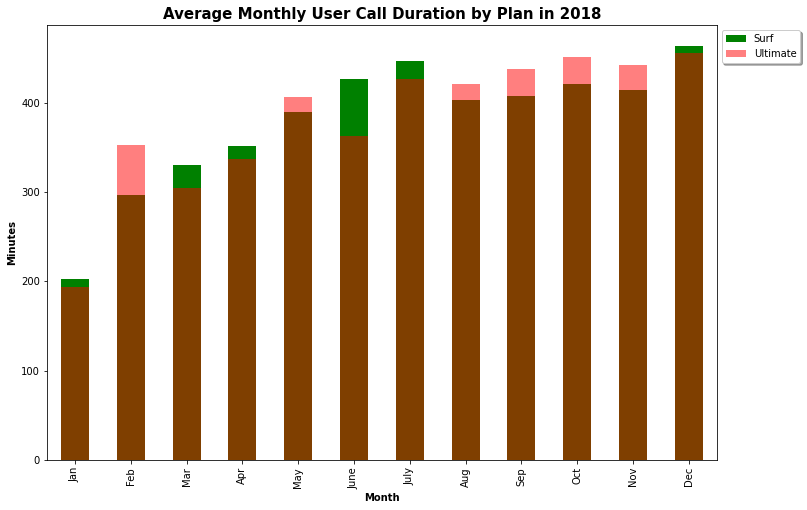

In [55]:
plot = df_average_monthly_call_duration_by_plan['surf'].plot(
        label='Surf',
        kind='bar',
        figsize=[12,8],
        color='g',
        )

plot = df_average_monthly_call_duration_by_plan['ultimate'].plot(
        label='Ultimate',
        kind='bar',
        color='r',
        alpha=0.5
        )

plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month', fontweight ='bold')
plt.ylabel('Minutes', fontweight ='bold')
plt.title('Average Monthly User Call Duration by Plan in 2018', fontweight ='bold', fontsize = 15)

plt.legend(bbox_to_anchor=(1, 1), fancybox=True, framealpha=1, shadow=True)
plt.show()

In [56]:
df_total_monthly_calls_duration_per_user_by_plan = df_merged_all_with_plan.groupby(['plan','date','user_id'])['rounded_duration_minutes'].sum()

df_total_monthly_calls_duration_per_user_by_plan

plan      date        user_id
surf      2018-01-31  1042       114
                      1362       292
          2018-02-28  1042       254
                      1099        39
                      1138       307
                                ... 
ultimate  2018-12-31  1482        56
                      1487       416
                      1490       368
                      1493       473
                      1497       300
Name: rounded_duration_minutes, Length: 2293, dtype: int64

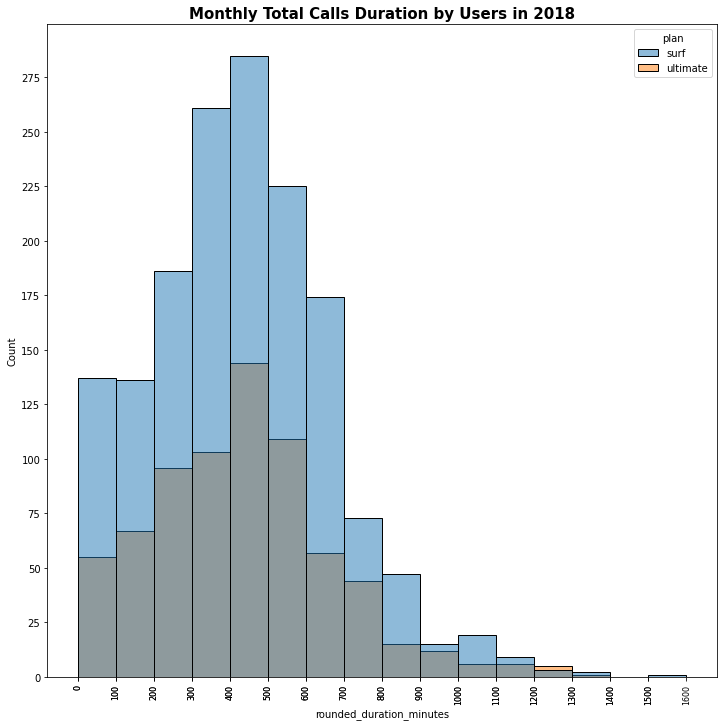

In [57]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.histplot(df_total_monthly_calls_duration_per_user_by_plan, x=df_total_monthly_calls_duration_per_user_by_plan, hue="plan", binwidth=100, #binrange=[0,160000]
                 )
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.set_yticks(np.arange(0, 300, step=25))
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Monthly Total Calls Duration by Users in 2018', fontweight ='bold', fontsize = 15)
plt.show()

In [58]:
df_total_monthly_calls_duration_per_user_by_plan.reset_index().pivot_table(index= 'plan', values= 'rounded_duration_minutes', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,rounded_duration_minutes,rounded_duration_minutes,rounded_duration_minutes,rounded_duration_minutes
plan,,,,
surf,428.749523,54968.279461,234.453150,425
ultimate,430.450000,57844.464812,240.508762,424


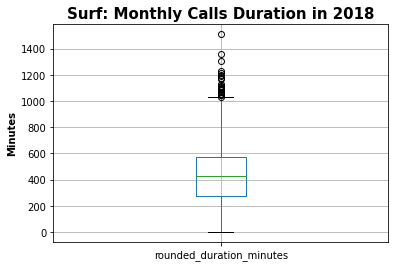

In [59]:
# Plot a boxplot to visualize the distribution of the monthly call duration

df_total_monthly_calls_duration_per_user_by_plan['surf'].to_frame().boxplot()
plt.ylabel('Minutes', fontweight ='bold')
plt.title('Surf: Monthly Calls Duration in 2018', fontweight ='bold', fontsize = 15)
plt.show()


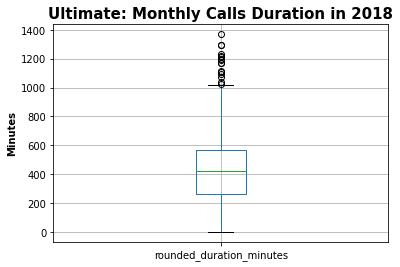

In [60]:
df_total_monthly_calls_duration_per_user_by_plan['ultimate'].to_frame().boxplot()
plt.ylabel('Minutes', fontweight ='bold')
plt.title('Ultimate: Monthly Calls Duration in 2018', fontweight ='bold', fontsize = 15)
plt.show()

The mean & std of monthly calls duration for Surf and Ultimate are similar indicating user behavior in both plans are the same.

### Messages

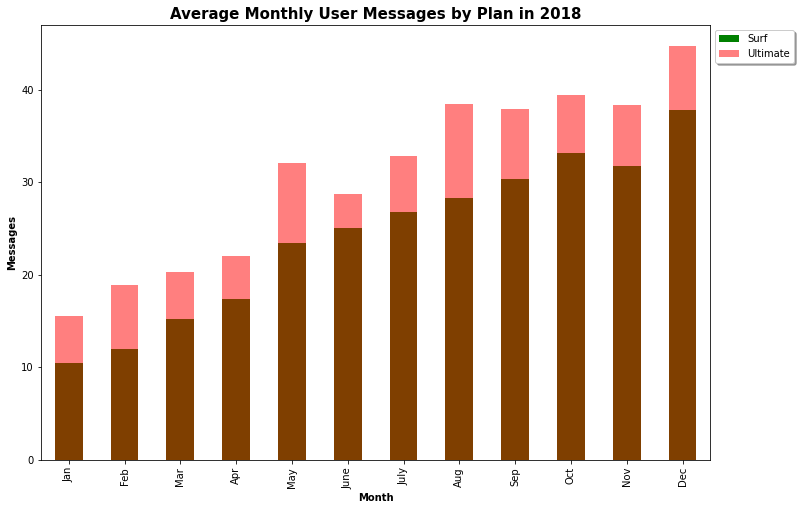

In [61]:
# Compare the number of messages users of each plan tend to send each month

df_average_monthly_messages_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date'])['messages'].mean()

plot = df_average_monthly_messages_by_user_by_plan['surf'].plot(
        label='Surf',
        kind='bar',
        figsize=[12,8],
        color='g',
        )

plot = df_average_monthly_messages_by_user_by_plan['ultimate'].plot(
        label='Ultimate',
        kind='bar',
        color='r',
        alpha=0.5
        )

plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month', fontweight ='bold')
plt.ylabel('Messages', fontweight ='bold')
plt.title('Average Monthly User Messages by Plan in 2018', fontweight ='bold', fontsize = 15)

plt.legend(bbox_to_anchor=(1, 1), fancybox=True, framealpha=1, shadow=True)
plt.show()

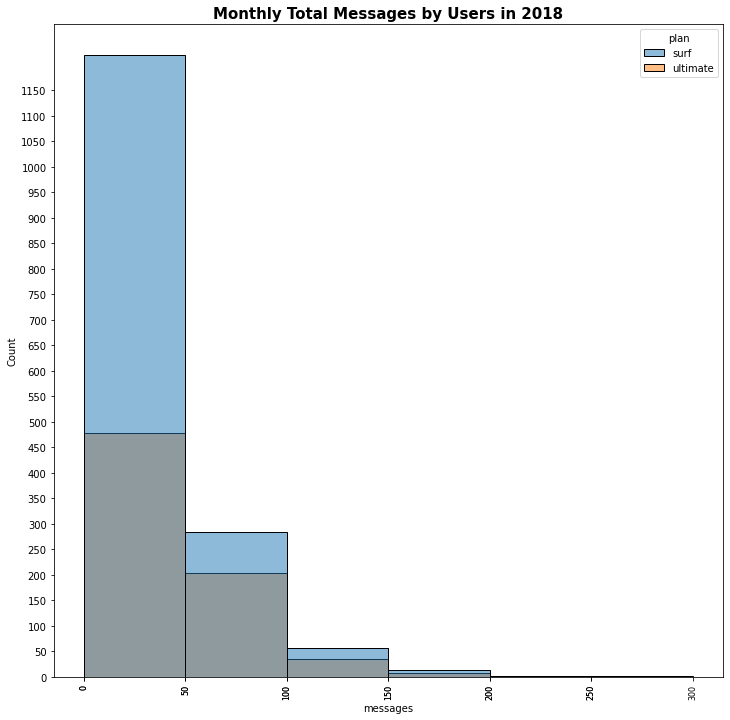

In [62]:
df_monthly_messages_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date','user_id'])['messages'].sum()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.histplot(df_monthly_messages_by_user_by_plan, x=df_monthly_messages_by_user_by_plan, hue="plan", binwidth=50
                 )
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.set_yticks(np.arange(0, 1200, step=50))
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Monthly Total Messages by Users in 2018', fontweight ='bold', fontsize = 15)
plt.show()

In [63]:
df_monthly_messages_by_user_by_plan.reset_index().pivot_table(index= 'plan', values= 'messages', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,messages,messages,messages,messages
plan,,,,
surf,31.159568,1126.724522,33.566717,24
ultimate,37.551389,1208.756744,34.767179,30


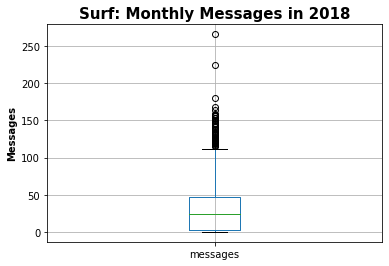

In [64]:
df_monthly_messages_by_user_by_plan['surf'].to_frame().boxplot()
plt.ylabel('Messages', fontweight ='bold')
plt.title('Surf: Monthly Messages in 2018', fontweight ='bold', fontsize = 15)
plt.show()

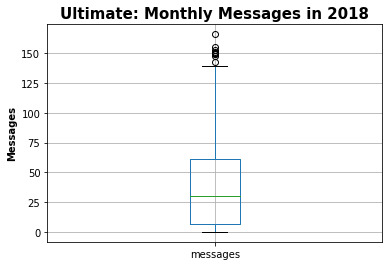

In [65]:
df_monthly_messages_by_user_by_plan['ultimate'].to_frame().boxplot()
plt.ylabel('Messages', fontweight ='bold')
plt.title('Ultimate: Monthly Messages in 2018', fontweight ='bold', fontsize = 15)
plt.show()

The average number of monthly messages users on Ultimate plan use is consistently much higher than Surf, however the variability from the mean in both plans are similar.

### Internet

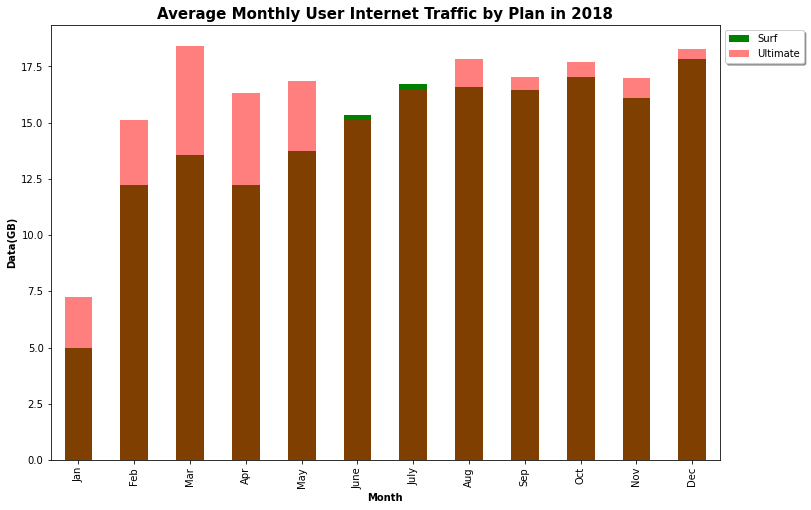

In [66]:
# Compare the amount of internet traffic consumed by users per plan

df_average_monthly_internet_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date'])['gb_rounded'].mean()

plot = df_average_monthly_internet_by_user_by_plan['surf'].plot(
        label='Surf',
        kind='bar',
        figsize=[12,8],
        color='g',
        )

plot = df_average_monthly_internet_by_user_by_plan['ultimate'].plot(
        label='Ultimate',
        kind='bar',
        color='r',
        alpha=0.5
        )

plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month', fontweight ='bold')
plt.ylabel('Data(GB)', fontweight ='bold')
plt.title('Average Monthly User Internet Traffic by Plan in 2018', fontweight ='bold', fontsize = 15)

plt.legend(bbox_to_anchor=(1, 1), fancybox=True, framealpha=1, shadow=True)
plt.show()

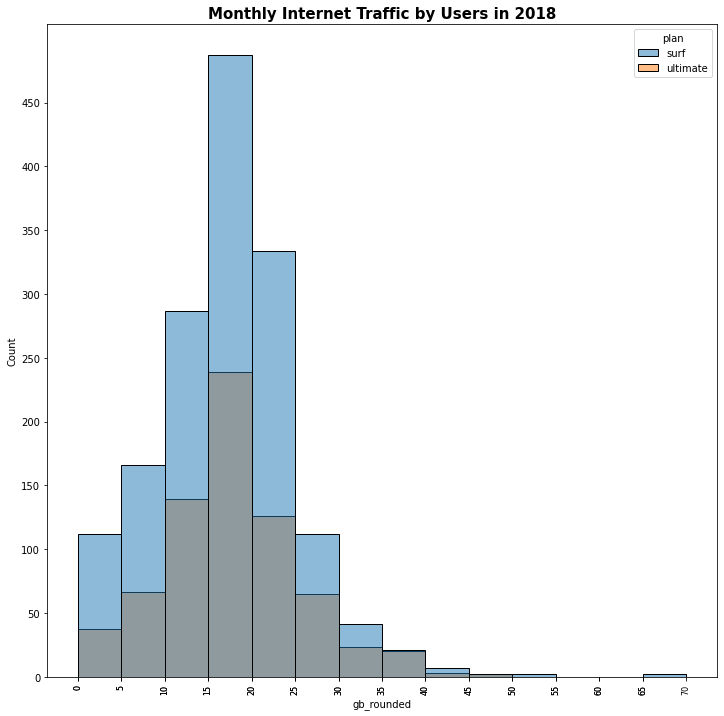

In [67]:
df_monthly_internet_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date','user_id'])['gb_rounded'].sum()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.histplot(df_monthly_internet_by_user_by_plan, x=df_monthly_internet_by_user_by_plan, hue="plan", binwidth=5
                 )
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.set_yticks(np.arange(0, 500, step=50))
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Monthly Internet Traffic by Users in 2018', fontweight ='bold', fontsize = 15)
plt.show()

In [68]:
df_monthly_internet_by_user_by_plan.reset_index().pivot_table(index= 'plan', values= 'gb_rounded', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,gb_rounded,gb_rounded,gb_rounded,gb_rounded
plan,,,,
surf,16.670693,61.58360,7.847522,17
ultimate,17.306944,58.83055,7.670108,17


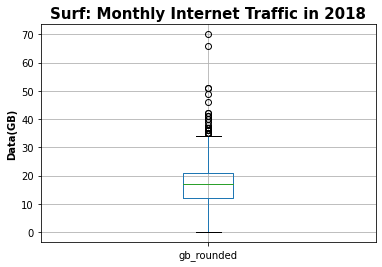

In [69]:
df_monthly_internet_by_user_by_plan['surf'].to_frame().boxplot()
plt.ylabel('Data(GB)', fontweight ='bold')
plt.title('Surf: Monthly Internet Traffic in 2018', fontweight ='bold', fontsize = 15)
plt.show()

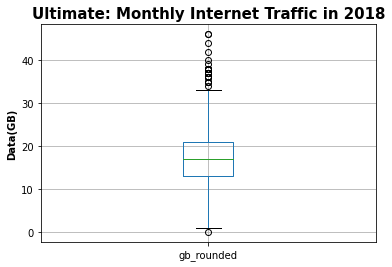

In [70]:
df_monthly_internet_by_user_by_plan['ultimate'].to_frame().boxplot()
plt.ylabel('Data(GB)', fontweight ='bold')
plt.title('Ultimate: Monthly Internet Traffic in 2018', fontweight ='bold', fontsize = 15)
plt.show()

Average monthly internet traffic for user on Ultimate plan is barely higher than Surf plan users and both plans have similar variability. It's also worth mentioning that average monthly internet traffic for Surf is 16.6b, which is higher than the 15gb included in plan.

## Revenue

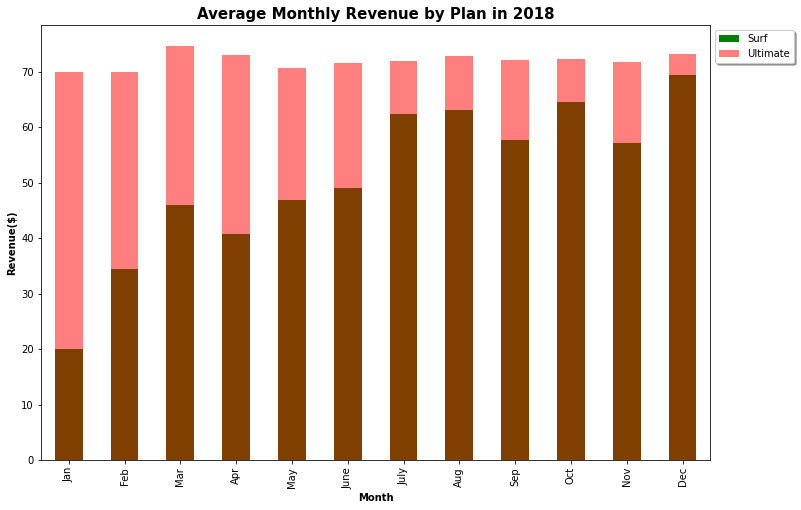

In [71]:
df_average_monthly_revenue_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date'])['Monthly_Revenue'].mean()

plot = df_average_monthly_revenue_by_user_by_plan['surf'].plot(
        label='Surf',
        kind='bar',
        figsize=[12,8],
        color='g',
        )

plot = df_average_monthly_revenue_by_user_by_plan['ultimate'].plot(
        label='Ultimate',
        kind='bar',
        color='r',
        alpha=0.5
        )

plot.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month', fontweight ='bold')
plt.ylabel('Revenue($)', fontweight ='bold')
plt.title('Average Monthly Revenue by Plan in 2018', fontweight ='bold', fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1), fancybox=True, framealpha=1, shadow=True)
plt.show()

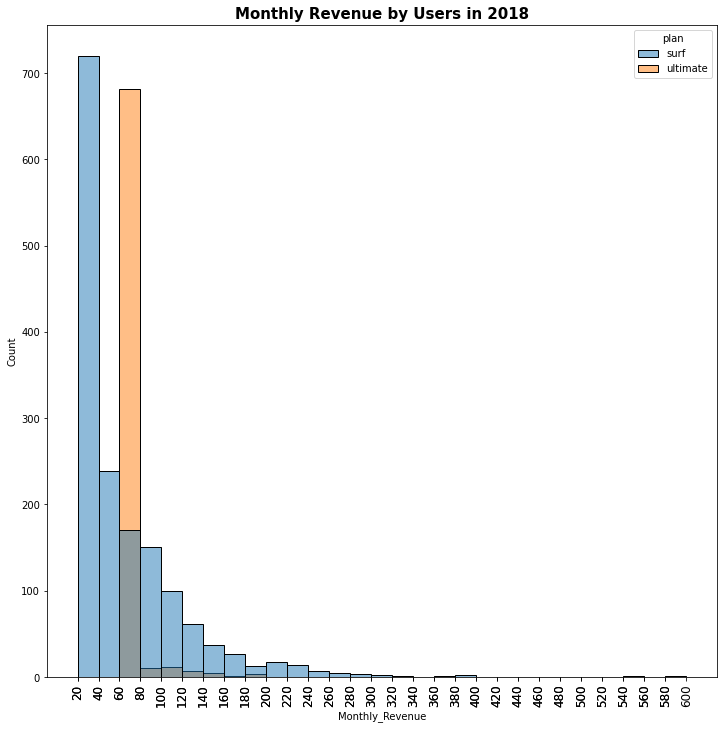

In [72]:
df_total_monthly_revenue_by_user_by_plan = df_merged_all_with_plan.groupby(['plan','date','user_id'])['Monthly_Revenue'].sum()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.histplot(df_total_monthly_revenue_by_user_by_plan, x=df_total_monthly_revenue_by_user_by_plan, hue="plan", binwidth=20
                 )
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
#ax.set_yticks(np.arange(0, 500, step=50))
ax.tick_params(axis='x', rotation=90, labelsize=12)
plt.title('Monthly Revenue by Users in 2018', fontweight ='bold', fontsize = 15)
plt.show()

In [73]:
df_total_monthly_revenue_by_user_by_plan.reset_index().pivot_table(index= 'plan', values= 'Monthly_Revenue', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,Monthly_Revenue,Monthly_Revenue,Monthly_Revenue,Monthly_Revenue
plan,,,,
surf,61.062416,3097.669668,55.656713,40.72
ultimate,72.702778,163.332955,12.780178,70.00


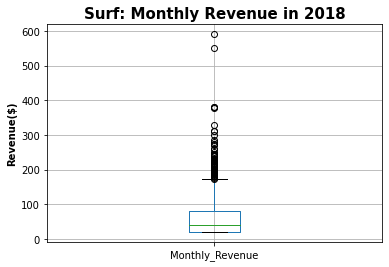

In [74]:
df_total_monthly_revenue_by_user_by_plan['surf'].to_frame().boxplot()
plt.ylabel('Revenue($)', fontweight ='bold')
plt.title('Surf: Monthly Revenue in 2018', fontweight ='bold', fontsize = 15)
plt.show()

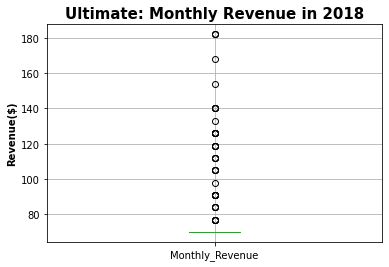

In [75]:
df_total_monthly_revenue_by_user_by_plan['ultimate'].to_frame().boxplot()
plt.ylabel('Revenue($)', fontweight ='bold')
plt.title('Ultimate: Monthly Revenue in 2018', fontweight ='bold', fontsize = 15)
plt.show()

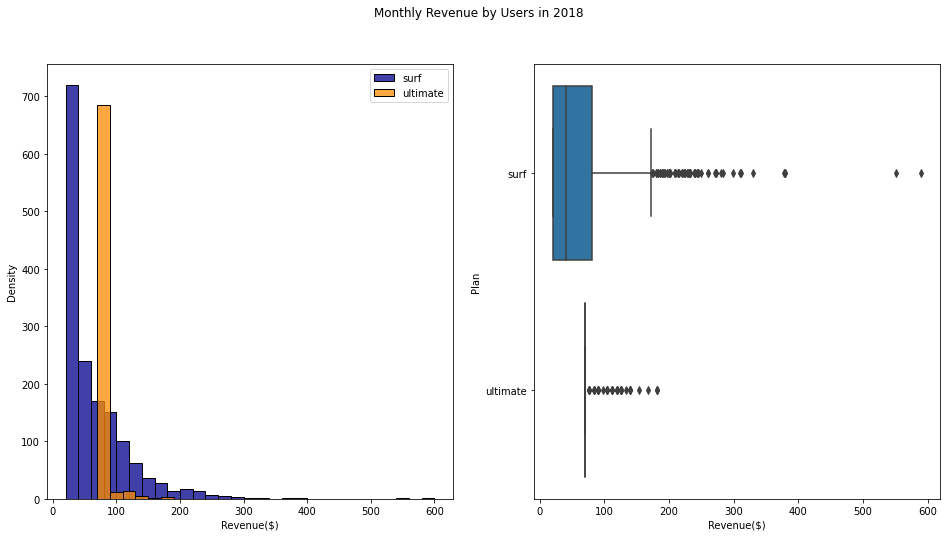

In [87]:
# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Create a histogram for the surf plan
sns.histplot(df_total_monthly_revenue_by_user_by_plan['surf'], color='darkblue', binwidth=20, ax=axes[0]
                 )
# Create a histogram for the second plan
sns.histplot(df_total_monthly_revenue_by_user_by_plan['ultimate'], color='darkorange', binwidth=20, ax=axes[0]
                 )
# Create a boxplot for both plans
sns.boxplot(data=df_total_monthly_revenue_by_user_by_plan.to_frame().reset_index(), x="Monthly_Revenue", y="plan", ax=axes[1])

axes[0].legend(loc='upper right', labels=['surf','ultimate'])
axes[0].set_xlabel('Revenue($)')
axes[0].set_ylabel('Density')
axes[1].set_xlabel('Revenue($)')
axes[1].set_ylabel('Plan')

fig.suptitle('Monthly Revenue by Users in 2018');

plt.show()

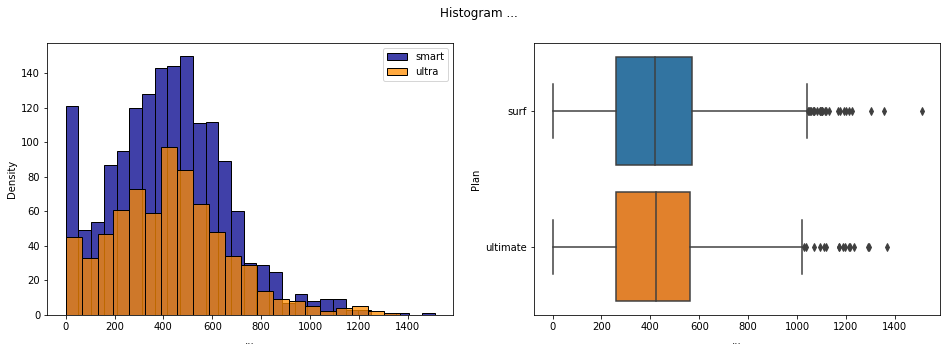

In [80]:
# Create one row with 2 columns with the 16 x 5 size
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create 2 histograms for each plan. With ax=axes you can control in which column this graph will be located
sns.histplot(df_merged_all_with_plan.query('plan == "surf"')['rounded_duration_minutes'], color='darkblue', ax=axes[0])
sns.histplot(df_merged_all_with_plan.query('plan == "ultimate"')['rounded_duration_minutes'], color='darkorange', ax=axes[0])

# Create one boxplot for 2 plans in the second column. To change boxplot from horizontal to vertical you need to exchange values in x/y
sns.boxplot(data=df_merged_all_with_plan.sort_values(by='plan'), x='rounded_duration_minutes', y='plan', ax=axes[1])

# Add lables for each graph
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('...')
axes[0].set_ylabel('Density')
axes[1].set_xlabel('...')
axes[1].set_ylabel('Plan')

# Add overall title
fig.suptitle('Histogram ...');

Average monthly revenue from users on Ultimate is higher by $11 than Surf but there's a lot of variability in monthly revenue amongst users of Surf compared to Ultimate.

## Test statistical hypotheses

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

In [77]:
# Test the hypotheses
# H0(null): average revenue from users of Ultimate = average revenue from users of Surf
# H1(alternative): average revenue from users of Ultimate != average revenue from users of Surf
# This is a 2-sided test
# Critical significance level of 5% is reasonable

sample_1 = df_merged_all_with_plan[df_merged_all_with_plan['plan'] == 'surf']['Monthly_Revenue']
sample_2 = df_merged_all_with_plan[df_merged_all_with_plan['plan'] == 'ultimate']['Monthly_Revenue']

alpha = 0.05

variance_test = st.levene(sample_1,sample_2)

if variance_test.pvalue < alpha:
    Levene_test_result = False
else:
    Levene_test_result = True

print('Variances of the populations should be considered equal?', Levene_test_result)

#Since p-value from levene test is less than alpha, we conclude that variances of the two samples are not equal

results = st.ttest_ind(sample_1, sample_2,equal_var = Levene_test_result)

print('T-test p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Variances of the populations should be considered equal? False
T-test p-value:  2.7836646515264315e-17
We reject the null hypothesis


Based on p-value & our chosen critical significance level from ttest for two independent samples, the average revenue from users of Surf plan differs from average revenue of users of Ultimate plan

Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [78]:
df_merged_all_with_plan_and_city = pd.merge(df_merged_all_with_plan,df_users[['user_id','city']], on='user_id', how='left')
df_merged_all_with_plan_and_city.sample(5)

,user_id,date,calls,rounded_duration_minutes,messages,gb_rounded,plan,Monthly_Revenue,city
2304,1131,2018-08-31,0,0,0,12,surf,20.00,"Los Angeles-Long Beach-Anaheim, CA MSA"
287,1064,2018-06-30,24,153,3,7,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
405,1085,2018-09-30,59,434,0,22,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1179,1256,2018-10-31,80,531,20,11,surf,20.93,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
1942,1422,2018-10-31,23,164,8,9,ultimate,70.00,"Los Angeles-Long Beach-Anaheim, CA MSA"


In [79]:
# Test the hypotheses

# H0(null): average revenue from users in NY-NJ area = average revenue of users from everywhere else
# H1(alternative): average revenue from users in NY-NJ area != average revenue of users from everywhere else
# This is a 2-sided test
# Critical significance level of 5% is reasonable

sample_1 = df_merged_all_with_plan_and_city[df_merged_all_with_plan_and_city['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['Monthly_Revenue']
sample_2 = df_merged_all_with_plan_and_city[df_merged_all_with_plan_and_city['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['Monthly_Revenue']

alpha = 0.05

variance_test = st.levene(sample_1,sample_2)

if variance_test.pvalue < alpha:
    Levene_test_result = False
else:
    Levene_test_result = True

print('Variances of the populations should be considered equal?', Levene_test_result)

#Since p-value from levene test is less than alpha, we conclude that variances of the two samples are not equal

results = st.ttest_ind(sample_1, sample_2,equal_var = Levene_test_result)

print('T-test p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Variances of the populations should be considered equal? True
T-test p-value:  0.0419277233824283
We reject the null hypothesis


Based on p-value & our chosen critical significance level, the average revenue of users in NY-NJ area differs from average revenue of users in other regions

## General conclusion



Assumptions:
- Number of cancelled plans is negligible and won't skew data

Conclusions:
- Surf plan is almost twice as popular as Ultimate 
- Average revenue per user on Ultimate plan is more than Surf plan
- If price of additional 1gb for Surf is increased to $13 revenue from Surf will be almost equal to Ultimate (ttest p-value 0.6)